In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
import pickle

In [2]:
dataset = pd.read_excel("dataset_wingman.xlsx", header=0)
dataset

,Nama,Selvedge,Tipe_Selvedge,Berat,Berat_Bahan,Source,Bentuk_Potongan,Size,Ukuran,Warp,Cotton,Rivet,Patch,Prong Button,Warna,Price,Harga,Saled,Target
0,Cartenz,Red Line,Selvedge Garis,16oz,Mediumweight,Indonesia,Slim Fit,36,Besar,Indigo Rope,100% Cotton,Branded Black,Garuda Design,Branded Double,Black Sulphur,749000,Rp700.001 - Rp900.000,32,Tinggi
1,Marine Blue,Double Marine Blue Line,Selvedge Garis,18.5oz,Heavyweight,Indonesia,Slim Straight,40,Besar,Indigo Rope,100% Super Slub,Branded Washer-burr,Brazilian Tan,Branded Double,Deep Indigo,885000,Rp700.001 - Rp900.000,3,Rendah
2,NH 206 Akita,Red Line,Selvedge Garis,14oz,Mediumweight,Japan,Slim Fit,32,Sedang,Indigo Rope,100% Long Staple,Branded,Exclusive Design,Branded,Deep Indigo,779000,Rp700.001 - Rp900.000,0,Rendah
3,Taiho SS,Pink Line,Selvedge Garis,21oz,Heavyweight,Japan,Slim Straight,34,Sedang,Indigo Rope,100% Long Staple,Branded,Exclusive Design,Branded,Deep Indigo,1100000,Rp900.001 - Rp1.100.000,13,Sedang
4,KM 302 Kudara,White Line,Selvedge Garis,14oz,Mediumweight,Japan,Slim Tapered,28,Kecil,Indigo Rope,98% cotton 2% lycra,Branded,Exclusive Design,Branded,Deep Indigo,749000,Rp700.001 - Rp900.000,27,Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Arjuno,Blue White Line,Selvedge Garis,16oz,Mediumweight,Indonesia,Slim Fit,34,Sedang,Indigo Rope,100% Cotton,Branded,Garuda Design,Branded,Deep Indigo,685000,Rp500.001 - Rp700.000,9,Sedang
436,Twisted Black,Black Silver Line,Selvedge Garis,17oz,Heavyweight,Exclusive,Slim Straight,32,Sedang,Indigo Rope,100% Cotton,Branded,Natural,Branded,Deep Indigo,1100000,Rp900.001 - Rp1.100.000,29,Tinggi
437,Marapi SS,Black Line,Selvedge Garis,14oz,Mediumweight,Indonesia,Slim Straight,28,Kecil,Indigo Rope,100% Cotton,Branded Cooper,Garuda Design,Branded Double,Deep Indigo,625000,Rp500.001 - Rp700.000,10,Sedang
438,AX 209 Seiwa,Blue White Line,Selvedge Garis,14oz,Mediumweight,Japan,Slim Fit,30,Sedang,Indigo Rope,100% Cotton,Branded Washer-burr,Exclusive Design,Branded Double,Deep Indigo,749000,Rp700.001 - Rp900.000,29,Tinggi


In [3]:
dataset = dataset.drop(columns=['Nama','Selvedge','Berat','Size', 'Warp', 'Cotton', 'Rivet', 'Patch','Prong Button','Price', 'Saled'])
dataset

,Tipe_Selvedge,Berat_Bahan,Source,Bentuk_Potongan,Ukuran,Warna,Harga,Target
0,Selvedge Garis,Mediumweight,Indonesia,Slim Fit,Besar,Black Sulphur,Rp700.001 - Rp900.000,Tinggi
1,Selvedge Garis,Heavyweight,Indonesia,Slim Straight,Besar,Deep Indigo,Rp700.001 - Rp900.000,Rendah
2,Selvedge Garis,Mediumweight,Japan,Slim Fit,Sedang,Deep Indigo,Rp700.001 - Rp900.000,Rendah
3,Selvedge Garis,Heavyweight,Japan,Slim Straight,Sedang,Deep Indigo,Rp900.001 - Rp1.100.000,Sedang
4,Selvedge Garis,Mediumweight,Japan,Slim Tapered,Kecil,Deep Indigo,Rp700.001 - Rp900.000,Tinggi
...,...,...,...,...,...,...,...,...
435,Selvedge Garis,Mediumweight,Indonesia,Slim Fit,Sedang,Deep Indigo,Rp500.001 - Rp700.000,Sedang
436,Selvedge Garis,Heavyweight,Exclusive,Slim Straight,Sedang,Deep Indigo,Rp900.001 - Rp1.100.000,Tinggi
437,Selvedge Garis,Mediumweight,Indonesia,Slim Straight,Kecil,Deep Indigo,Rp500.001 - Rp700.000,Sedang
438,Selvedge Garis,Mediumweight,Japan,Slim Fit,Sedang,Deep Indigo,Rp700.001 - Rp900.000,Tinggi


In [4]:
dataset.to_excel("processeddata_wingman.xlsx", index=False)

In [5]:
missing_values = dataset.isnull().sum()

print(missing_values)

Tipe_Selvedge      0
Berat_Bahan        0
Source             0
Bentuk_Potongan    0
Ukuran             0
Warna              0
Harga              0
Target             0
dtype: int64


In [6]:
enc = LabelEncoder()
dataset['Tipe_Selvedge'] = enc.fit_transform(dataset['Tipe_Selvedge'].values)
dataset['Berat_Bahan'] = enc.fit_transform(dataset['Berat_Bahan'].values)
dataset['Source'] = enc.fit_transform(dataset['Source'].values)
dataset['Bentuk_Potongan'] = enc.fit_transform(dataset['Bentuk_Potongan'].values)
dataset['Ukuran'] = enc.fit_transform(dataset['Ukuran'].values)
dataset['Warna'] = enc.fit_transform(dataset['Warna'].values)
dataset['Harga'] = enc.fit_transform(dataset['Harga'].values)
dataset['Target'] = enc.fit_transform(dataset['Target'].values)

dataset

,Tipe_Selvedge,Berat_Bahan,Source,Bentuk_Potongan,Ukuran,Warna,Harga,Target
0,0,2,1,0,0,0,3,2
1,0,1,1,1,0,1,3,0
2,0,2,2,0,2,1,3,0
3,0,1,2,1,2,1,4,1
4,0,2,2,2,1,1,3,2
...,...,...,...,...,...,...,...,...
435,0,2,1,0,2,1,2,1
436,0,1,0,1,2,1,4,2
437,0,2,1,1,1,1,2,1
438,0,2,2,0,2,1,3,2


In [7]:
cls_dataset = dataset['Target']
cls_dataset

0      2
1      0
2      0
3      1
4      2
      ..
435    1
436    2
437    1
438    2
439    0
Name: Target, Length: 440, dtype: int32

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset, cls_dataset, test_size=0.3, random_state=1)
tree_dataset = DecisionTreeClassifier(random_state=1)
tree_dataset.fit(xtrain, ytrain)

tree_text = export_text(tree_dataset, feature_names=list(dataset.columns))
print(tree_text)

|--- Target <= 0.50
|   |--- class: 0
|--- Target >  0.50
|   |--- Target <= 1.50
|   |   |--- class: 1
|   |--- Target >  1.50
|   |   |--- class: 2



In [9]:
y_pred = tree_dataset.predict(xtest)
cm = confusion_matrix (ytest, y_pred)
print("Confusion Matrix")
print(cm)
akurasi = classification_report (ytest, y_pred)
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi", akurasi)
ypred = tree_dataset.predict(xtest)
akurasi = accuracy_score(ytest, ypred)
print ("Tingkat Akurasi : %d persen" %(akurasi*100))

Confusion Matrix
[[39  0  0]
 [ 0 56  0]
 [ 0  0 37]]
Tingkat Akurasi Algoritma C4.5
Akurasi               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        37

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

Tingkat Akurasi : 100 persen


In [10]:
model = DecisionTreeClassifier()

In [11]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [12]:
ypred = model.predict(xtest)

In [13]:
prediction = model.predict(xtest)
print(prediction)

[0 1 1 2 0 1 0 0 2 2 2 2 0 0 1 0 0 1 2 1 1 0 2 1 2 2 1 0 2 0 0 2 0 1 1 1 1
 2 1 1 0 1 1 1 2 2 2 1 1 1 1 1 0 0 1 1 2 1 1 0 1 0 0 1 1 2 2 0 2 2 1 0 0 1
 2 1 0 2 1 1 2 0 1 1 2 2 0 1 2 1 1 1 0 1 0 2 1 0 0 1 1 1 0 1 1 0 2 0 2 0 1
 0 0 2 1 1 0 0 2 1 1 2 1 2 2 2 2 2 0 1 0 1]


In [14]:
#procedure untuk memetakan matrik konfusi
def plot_confusion_matrix(ytrue, ypred, classes,
                            normalize=False,
                            title=None,
                            cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix' 
        else:
            title = 'Confusion Matrix, without normalization'
            
    #compute confusion matrix
    cm = confusion_matrix(ytrue, ypred)
    #Only use the labels that appear in the data
    classes = classes[unique_labels(ytrue, ypred)]
    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #we want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           #... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    #rotate the tick labels and set their aligment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    #loop over data dimensions and careate text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[39  0  0]
 [ 0 56  0]
 [ 0  0 37]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


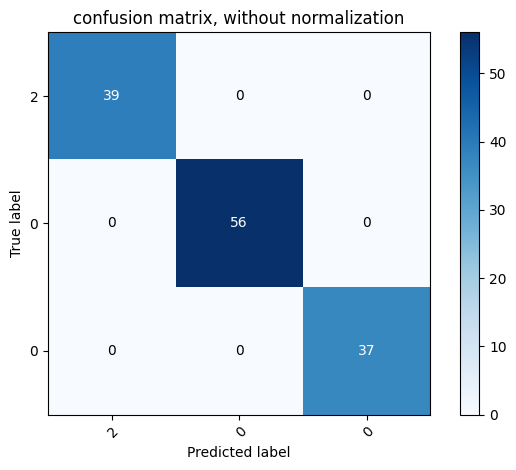

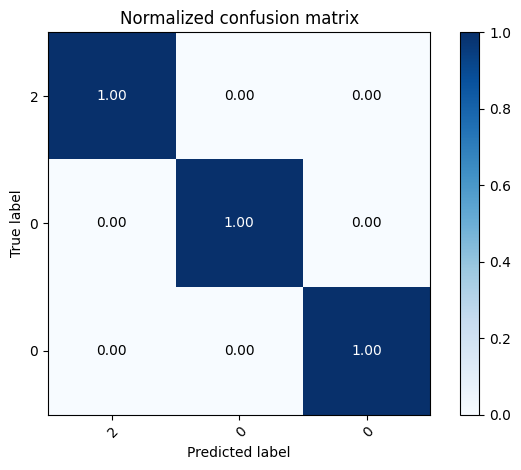

In [15]:
class_names = cls_dataset
np.set_printoptions(precision=2)

plot_confusion_matrix(ytest, prediction, classes=class_names,
                    title='confusion matrix, without normalization')

plot_confusion_matrix(ytest, prediction, classes=class_names, normalize=True,
                     title='Normalized confusion matrix')


plt.show()

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree_dataset,out_file="C45_Wingman.dot", class_names = [ "Tinggi", "Sedang", "Rendah"],
              feature_names= dataset.columns, impurity=False, filled=True)


In [17]:
ypred = ypred.reshape(-1, 1)

In [18]:
from sklearn.metrics import accuracy_score

ypred = tree_dataset.predict(xtest)
ypred = ypred.reshape(-1, 1)
akurasi = accuracy_score(ytest, ypred)
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi:", akurasi)
print("Tingkat Akurasi: {}%".format(akurasi * 100))

Tingkat Akurasi Algoritma C4.5
Akurasi: 1.0
Tingkat Akurasi: 100.0%


In [19]:
clf = DecisionTreeClassifier()
clf.fit(ytest.values.reshape(-1, 1), ypred)
print(clf)

DecisionTreeClassifier()


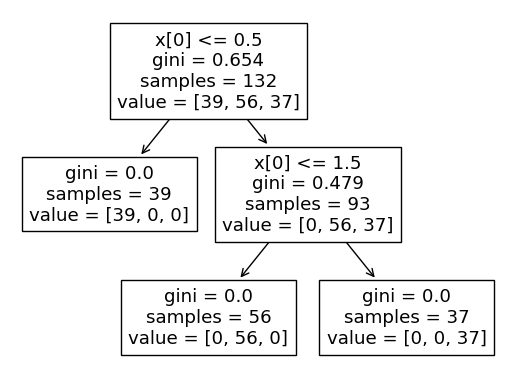

In [20]:
tree.plot_tree(clf);

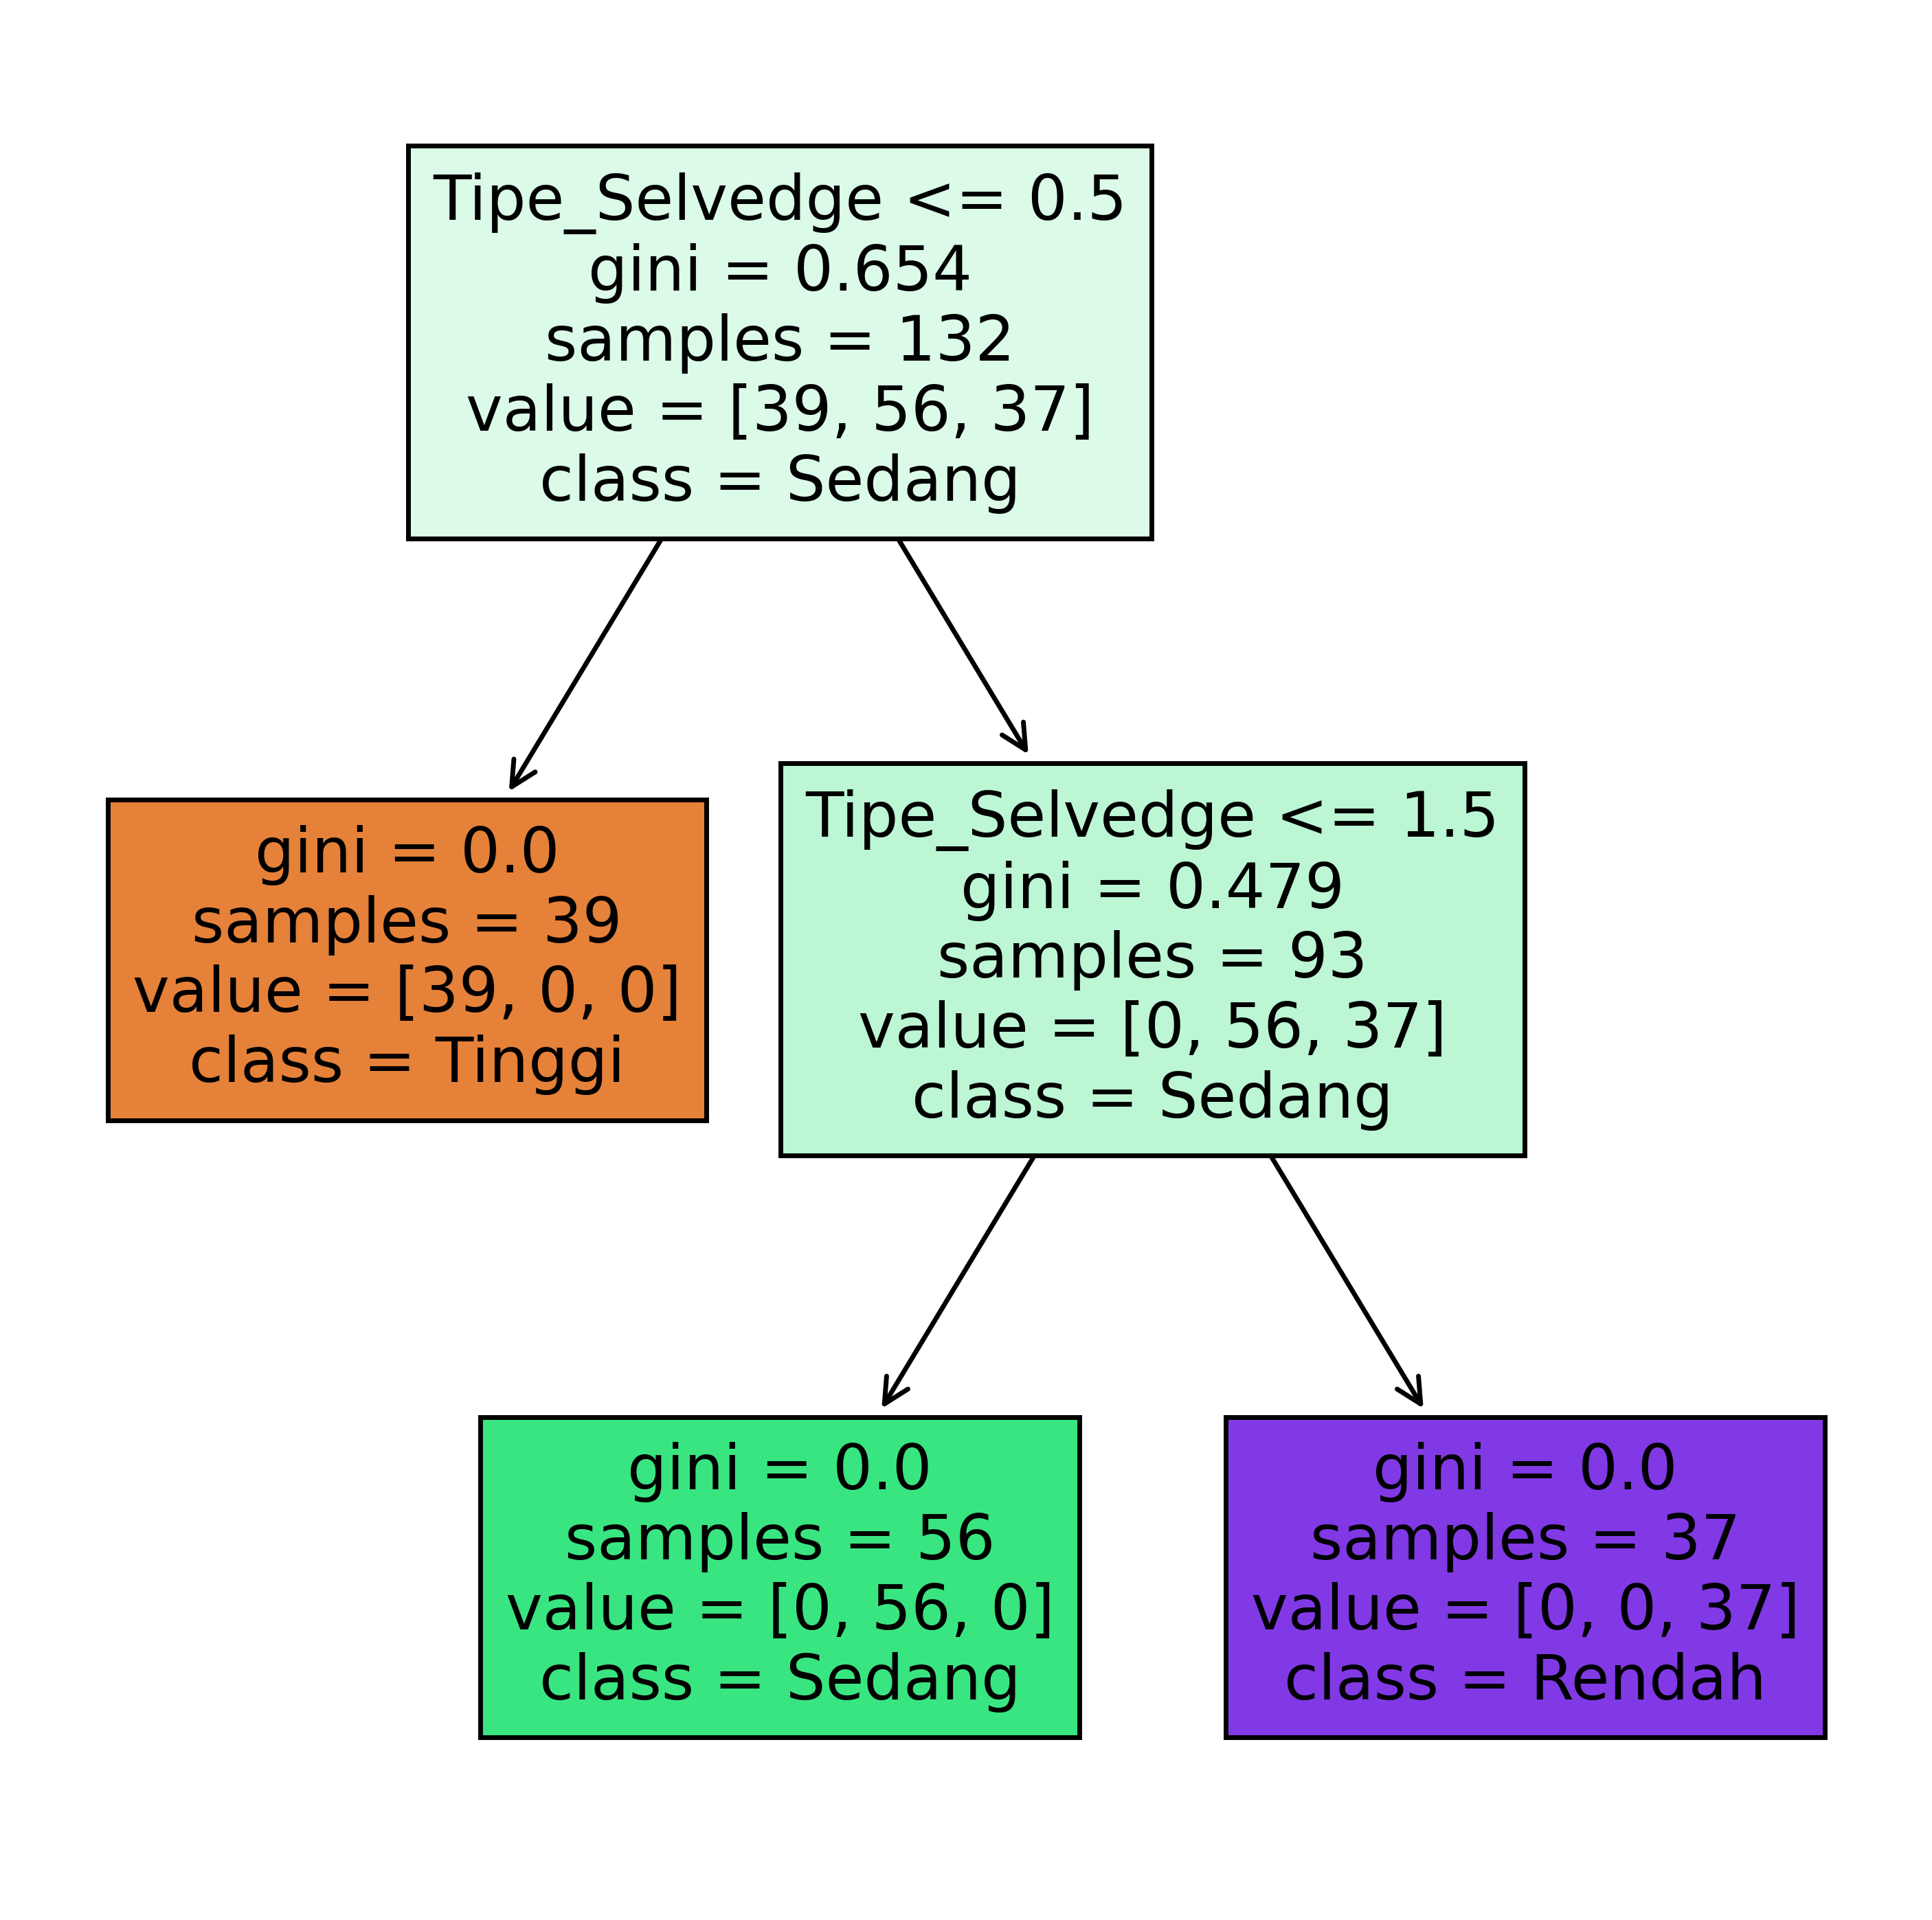

In [22]:
fn=['Tipe_Selvedge','Berat_Bahan','Source','Bentuk_Potongan','Ukuran', 'Warna', 'Harga', 'Target']
cn=['Tinggi','Sedang', 'Rendah']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)

plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
# fig.savefig('image.png')